In [1]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet

--2023-12-11 09:46:46--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.161.127.198, 3.161.127.152, 3.161.127.104, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.161.127.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110439634 (105M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2019-01.parquet’

yellow_tripdata_201 100%[===================>] 105.32M  14.4MB/s    in 8.4s    

2023-12-11 09:46:55 (12.5 MB/s) - ‘yellow_tripdata_2019-01.parquet’ saved [110439634/110439634]



In [2]:
pip install great_expectations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached marshmallow-3.20.1-py3-none-any.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 11.4 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Attempting uninstall: ruamel.yaml
    Found existing installation: ruamel.yaml 0.17.32
    Uninstalling ruamel.yaml-0.17.32:
      Successfully uninstalled ruamel.yaml-0.17.32
Note: you may need to restart the kernel to use updated packages.


https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [ ]:
import datetime
import numpy as np
import pandas as pd

import great_expectations as gx

from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_parquet('yellow_tripdata_2019-01.parquet')
sample_df = df.sample(10000)

https://legacy.docs.greatexpectations.io/en/0.12.0/reference/glossary_of_expectations.html

https://greatexpectations.io/expectations/

In [ ]:
df_gx = gx.dataset.PandasDataset(sample_df)

In [ ]:
df_gx.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
5702942,2,2019-01-24 16:12:25,2019-01-24 16:16:01,1.0,0.74,1.0,N,163,48,2,4.5,1.0,0.5,0.00,0.0,0.3,6.30,0.0,None
3589770,1,2019-01-16 02:29:24,2019-01-16 02:48:43,2.0,5.90,1.0,N,79,238,1,19.5,0.5,0.5,4.15,0.0,0.3,24.95,NaN,None


In [ ]:
df_gx.dtypes

  and should_run_async(code)



VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

(array([  48.,    0., 7066.,    0.,    0., 2833.,    0.,   35.,    0.,
          18.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

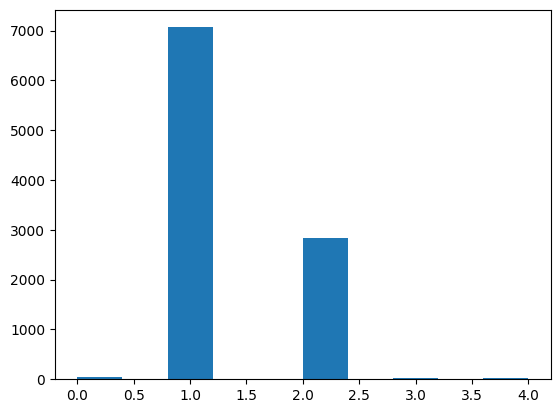

In [ ]:
plt.hist(df_gx['payment_type'])

(array([ 161., 7104.,    0., 1407.,    0.,  397.,  166.,    0.,  437.,
         280.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

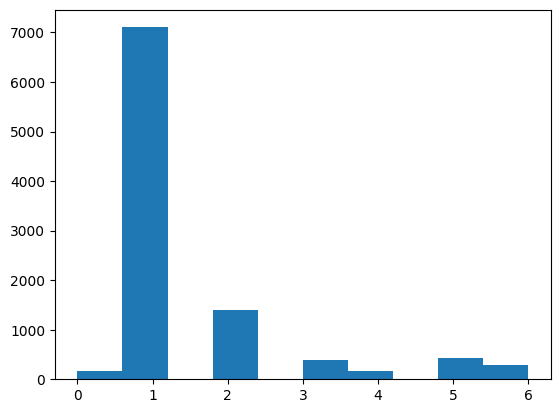

In [ ]:
plt.hist(df_gx['passenger_count'])

(array([8.628e+03, 7.560e+02, 3.310e+02, 1.940e+02, 7.700e+01, 8.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  4.773,  9.546, 14.319, 19.092, 23.865, 28.638, 33.411,
        38.184, 42.957, 47.73 ]),
 <BarContainer object of 10 artists>)

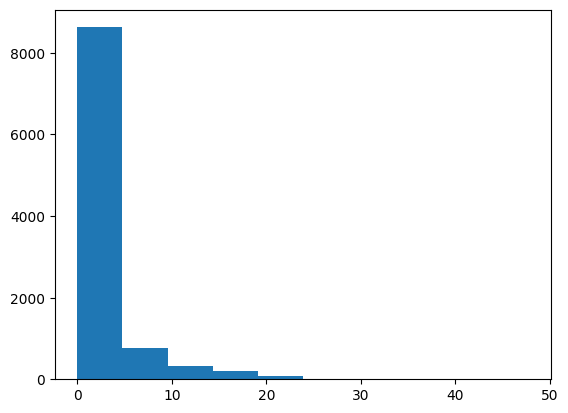

In [ ]:
plt.hist(df_gx['trip_distance'])

(array([2.000e+00, 6.000e+00, 9.084e+03, 6.850e+02, 2.100e+02, 8.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([-6.30600e+01, -3.16480e+01, -2.36000e-01,  3.11760e+01,
         6.25880e+01,  9.40000e+01,  1.25412e+02,  1.56824e+02,
         1.88236e+02,  2.19648e+02,  2.51060e+02]),
 <BarContainer object of 10 artists>)

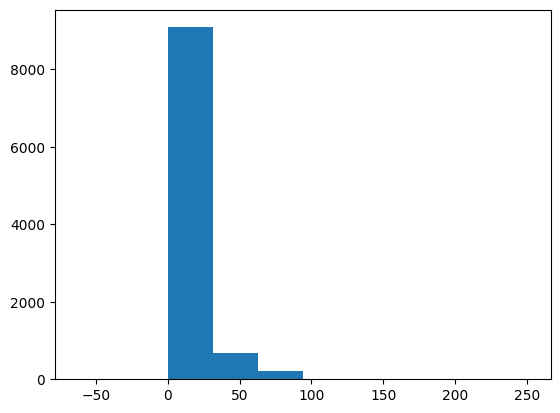

In [ ]:
plt.hist(df_gx['total_amount'])

### Create expectations

In [ ]:
df_gx.expect_column_values_to_be_between(column='payment_type', min_value=0, max_value=3, mostly=0.9)

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_be_between",
    "kwargs": {
      "column": "payment_type",
      "min_value": 0,
      "max_value": 3,
      "mostly": 0.9,
      "result_format": "BASIC"
    },
    "meta": {}
  },
  "result": {
    "element_count": 10000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 13,
    "unexpected_percent": 0.13,
    "unexpected_percent_total": 0.13,
    "unexpected_percent_nonmissing": 0.13,
    "partial_unexpected_list": [
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4,
      4
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
df_gx.expect_column_values_to_be_of_type(column='payment_type', type_='int64')

{
  "success": true,
  "expectation_config": {
    "expectation_type": "_expect_column_values_to_be_of_type__aggregate",
    "kwargs": {
      "column": "payment_type",
      "type_": "int64",
      "result_format": "BASIC"
    },
    "meta": {}
  },
  "result": {
    "observed_value": "int64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### Create suite

In [ ]:
context = gx.get_context()

INFO:great_expectations.data_context.types.base:Created temporary directory '/tmp/tmph3p5lo1w' for ephemeral docs site


In [ ]:
df = pd.read_parquet('yellow_tripdata_2019-01.parquet')
train = df.head(1000)
test = df.tail(1000)
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [ ]:
validator = context.sources.pandas_default.read_csv("train.csv")

  warnings.warn(



In [ ]:
datasource_name = 'tripdata_train'
datasource = context.sources.add_pandas(datasource_name)

asset_name = 'tripdata_asset'
path_to_data = '/content/train.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

batch_request = asset.build_batch_request()

In [ ]:
batch_request

BatchRequest(datasource_name='tripdata_train', data_asset_name='tripdata_asset', options={})

In [ ]:
tripdata_asset = context.get_datasource("tripdata_train").get_asset("tripdata_asset")

In [ ]:
my_batch_request = tripdata_asset.build_batch_request()

In [ ]:
batches = tripdata_asset.get_batch_list_from_batch_request(my_batch_request)

  warnings.warn(



In [ ]:
for batch in batches:
    print(batch.batch_spec)

  and should_run_async(code)



{'reader_method': 'read_csv', 'reader_options': {'filepath_or_buffer': PosixPath('/content/train.csv')}}


In [ ]:
suite = context.add_expectation_suite(expectation_suite_name="taxi_suite")

In [ ]:
context.add_or_update_expectation_suite("taxi_suite")

{
  "expectation_suite_name": "taxi_suite",
  "ge_cloud_id": null,
  "expectations": [],
  "data_asset_type": null,
  "meta": {
    "great_expectations_version": "0.17.22"
  }
}

In [ ]:
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="taxi_suite",
)
validator.head()

  warnings.warn(



Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,NaN


In [ ]:
expectation_validation_result = validator.expect_column_values_to_not_be_null(
    column="VendorID"
)
print(expectation_validation_result)

  warnings.warn(



Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "VendorID",
      "batch_id": "tripdata_train-tripdata_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}


In [ ]:
validator.expect_column_values_to_not_be_null("payment_type")
validator.expect_column_values_to_be_between(column='payment_type', min_value=0, max_value=4)
validator.expect_column_values_to_be_of_type(column='payment_type', type_='int64')
validator.expect_column_values_to_not_be_null(column = "tip_amount", mostly = .9)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "tip_amount",
      "mostly": 0.9,
      "batch_id": "tripdata_train-tripdata_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.save_expectation_suite(discard_failed_expectations=False)

In [ ]:
suite = context.get_expectation_suite("taxi_suite")

In [ ]:
suite

{
  "expectation_suite_name": "taxi_suite",
  "ge_cloud_id": null,
  "expectations": [
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "VendorID"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "payment_type"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_between",
      "kwargs": {
        "column": "payment_type",
        "max_value": 4,
        "min_value": 0
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_of_type",
      "kwargs": {
        "column": "payment_type",
        "type_": "int64"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "tip_amount",
        "mostly": 0.9
      },
      "meta": {}
    }
  ],
  "data_asset_type": null,
  "meta": {
    "g

In [ ]:
import json

with open( "taxi_suite.json", "w") as my_file:
    my_file.write(
        json.dumps(suite.to_json_dict())
    )

In [ ]:
suite.show_expectations_by_expectation_type()

[ { 'expect_column_values_to_be_between': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'max_value': 4,
                                            'min_value': 0}},
  { 'expect_column_values_to_be_of_type': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'type_': 'int64'}},
  { 'expect_column_values_to_not_be_null': { 'column': 'VendorID',
                                             'domain': 'column'}},
  { 'expect_column_values_to_not_be_null': { 'column': 'payment_type',
                                             'domain': 'column'}},
  { 'expect_column_values_to_not_be_null': { 'column': 'tip_amount',
                                             'domain': 'column',
                                             'mostly': 0.9}}]


In [ ]:
from great_expectations.core.expectation_suite import ExpectationConfiguration

In [ ]:
updated_config = ExpectationConfiguration(
    expectation_type="expect_column_values_to_be_between",
    kwargs={
        "auto": True,
        "column": "passenger_count",
        "domain": "column",
        "min_value": 1,
        "max_value": 4,
        "mostly": 1.0,
    },
)

In [ ]:
suite.add_expectation(updated_config)

{"expectation_type": "expect_column_values_to_be_between", "kwargs": {"auto": true, "column": "passenger_count", "domain": "column", "min_value": 1, "max_value": 4, "mostly": 1.0}, "meta": {}}

In [ ]:
suite.show_expectations_by_expectation_type()

[ { 'expect_column_values_to_be_between': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'max_value': 4,
                                            'min_value': 0}},
  { 'expect_column_values_to_be_between': { 'auto': True,
                                            'column': 'passenger_count',
                                            'domain': 'column',
                                            'max_value': 4,
                                            'min_value': 1,
                                            'mostly': 1.0}},
  { 'expect_column_values_to_be_of_type': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'type_': 'int64'}},
  { 'expect_column_values_to_not_be_null': { 'column': 'VendorID',
                                             'domain': 'column'}},
  { 'expect_column_values_to_not_be_

In [ ]:
remove_exp = ExpectationConfiguration(
    expectation_type="expect_column_values_to_not_be_null",
    kwargs={"column": "VendorID"},
)

In [ ]:
suite.remove_expectation(
    remove_exp, match_type="domain", remove_multiple_matches=False
)

[{"expectation_type": "expect_column_values_to_not_be_null", "kwargs": {"column": "VendorID"}, "meta": {}}]

In [ ]:
suite.show_expectations_by_expectation_type()

[ { 'expect_column_values_to_be_between': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'max_value': 4,
                                            'min_value': 0}},
  { 'expect_column_values_to_be_between': { 'auto': True,
                                            'column': 'passenger_count',
                                            'domain': 'column',
                                            'max_value': 4,
                                            'min_value': 1,
                                            'mostly': 1.0}},
  { 'expect_column_values_to_be_of_type': { 'column': 'payment_type',
                                            'domain': 'column',
                                            'type_': 'int64'}},
  { 'expect_column_values_to_not_be_null': { 'column': 'payment_type',
                                             'domain': 'column'}},
  { 'expect_column_values_to_not

In [ ]:
context.save_expectation_suite(suite)

  warnings.warn(



In [ ]:
with open( "taxi_suite.json", "w") as my_file:
    my_file.write(
        json.dumps(suite.to_json_dict())
    )

In [ ]:
validator.expect_column_mean_to_be_between(
    column="trip_distance", auto=True
)

Generating Expectations:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]


Profiling Dataset:         0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]


Generating Expectations: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_mean_to_be_between",
    "kwargs": {
      "min_value": 2.89684,
      "strict_min": false,
      "max_value": 2.89684,
      "strict_max": false,
      "column": "trip_distance",
      "auto": true,
      "batch_id": "tripdata_train-tripdata_asset"
    },
    "meta": {
      "profiler_config": {
        "class_name": "BaseRuleBasedProfiler",
        "module_name": "great_expectations.rule_based_profiler.rule_based_profiler",
        "name": "expect_column_mean_to_be_between",
        "config_version": 1.0,
        "variables": {},
        "rules": [
          {
            "domain_builder": {
              "semantic_type_filter_class_name": null,
              "module_name": "great_expectations.rule_based_profiler.domain_builder.column_domain_builder",
              "exclude_semantic_types": null,
              "include_column_name_suffixes": null,
              "exclude_column_names": null,
        

### Validate

In [ ]:
suite

{
  "expectation_suite_name": "taxi_suite",
  "ge_cloud_id": null,
  "expectations": [
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "payment_type"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_between",
      "kwargs": {
        "column": "payment_type",
        "max_value": 4,
        "min_value": 0
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_of_type",
      "kwargs": {
        "column": "payment_type",
        "type_": "int64"
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_not_be_null",
      "kwargs": {
        "column": "tip_amount",
        "mostly": 0.9
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_between",
      "kwargs": {
        "column": "passenger_count",
        "auto": true,
        "domain": "column",
        "min_value": 1,
 

In [ ]:
test = pd.read_csv("test.csv")

# validator = context.sources.add_pandas("taxi_test_datasource").read_dataframe(
#     test, asset_name="taxi_test", batch_metadata={"type": "test"}
# )

# validator.save_expectation_suite()

# checkpoint = context.add_or_update_checkpoint(
#     name="my_taxi_validator_checkpoint", validator=validator
# )

# checkpoint_result = checkpoint.run()

In [ ]:
# checkpoint_result;

In [ ]:
# context.build_data_docs()

In [ ]:
# context.open_data_docs()

In [ ]:
# !zip -r ge.zip /tmp/tmp0hr4od6g/

In [ ]:
datasource_name = 'tripdata_test'
datasource = context.sources.add_pandas(datasource_name)

asset_name = 'triptest_asset'
path_to_data = '/content/test.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

batch_request = asset.build_batch_request()

In [ ]:
batch_list = asset.get_batch_list_from_batch_request(batch_request)

  warnings.warn(



In [ ]:
batch_request_list = [batch.batch_request for batch in batch_list]

  and should_run_async(code)



In [ ]:
validations = [
    {"batch_request": batch.batch_request, "expectation_suite_name": "taxi_suite"}
    for batch in batch_list
]

In [ ]:
checkpoint = context.add_or_update_checkpoint(
    name="my_taxi_validator_checkpoint", validations=validations
)

checkpoint_result = checkpoint.run()

  warnings.warn(



Calculating Metrics:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
checkpoint_result

{
  "run_id": {
    "run_name": null,
    "run_time": "2023-10-18T16:32:09.101055+00:00"
  },
  "run_results": {
    "ValidationResultIdentifier::taxi_suite/__none__/20231018T163209.101055Z/tripdata_test-triptest_asset": {
      "validation_result": {
        "success": true,
        "results": [
          {
            "success": true,
            "expectation_config": {
              "expectation_type": "expect_column_values_to_not_be_null",
              "kwargs": {
                "column": "payment_type",
                "batch_id": "tripdata_test-triptest_asset"
              },
              "meta": {}
            },
            "result": {
              "element_count": 1000,
              "unexpected_count": 0,
              "unexpected_percent": 0.0,
              "partial_unexpected_list": [],
              "partial_unexpected_index_list": [],
              "partial_unexpected_counts": []
            },
            "meta": {},
            "exception_info": {
              "r

In [ ]:
!rm -rf /tmp/tmp0hr4od6g/

  and should_run_async(code)



In [ ]:
context.build_data_docs()

{'local_site': 'file:///tmp/tmp0hr4od6g/index.html'}

In [ ]:
context.open_data_docs()

In [ ]:
!zip -r ge.zip /tmp/tmp0hr4od6g/

  adding: tmp/tmp0hr4od6g/ (stored 0%)
  adding: tmp/tmp0hr4od6g/index.html (deflated 78%)
  adding: tmp/tmp0hr4od6g/validations/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/taxi_suite/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/taxi_suite/__none__/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/taxi_suite/__none__/20231017T083141.002544Z/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/taxi_suite/__none__/20231017T083141.002544Z/tripdata_test-triptest_asset.html (deflated 83%)
  adding: tmp/tmp0hr4od6g/validations/default/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/default/__none__/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/default/__none__/20231017T082144.549740Z/ (stored 0%)
  adding: tmp/tmp0hr4od6g/validations/default/__none__/20231017T082144.549740Z/taxi_test_datasource-taxi_test.html (deflated 80%)
  adding: tmp/tmp0hr4od6g/expectations/ (stored 0%)
  adding: tmp/tmp0hr4od6g/expectations/default.html (deflated 78%)
  adding: tmp/tmp0hr4od6g/expec